In [20]:
import pandas as pd
import numpy as np
from pandas import DataFrame,Series
import matplotlib.pyplot as plt
from sklearn import datasets

# 데이터셋 준비

In [438]:
iris = datasets.load_iris()

In [439]:
iris.target[np.where(iris.target != 2)] = 1
target = abs(iris.target - 1)
data = iris.data

# 로지스틱 회귀 알고리즘

In [432]:
def logit(data,params,target):
    # 각 데이터 포인트와 파라미터를 곱해서, 각 행을 기준으로 더한 n * 1의 열벡터를 생성한다.
    param_dot_data = np.sum(data*params,axis=1)
    # 이 n*1의 열벡터를 로지스틱 방정식에 통과시킨다
    logistic = 1/(1+np.exp(-param_dot_data))
    # 각 데이터 포인트의 예측값과, 참값 target간의 차이를 구한다.
    mse = logistic - target
    return(mse,logistic)

In [433]:
def gradient_descent(learning_rate,params,mse,data):
    # 차이(mse)를 그냥 사용하면 차원이 맞지 않아 에러가 발생한다. (150,)차원의 데이터셋을 (150,1) 차원으로 변경해준다.
    mse = mse.reshape(150,1)
    # 차이(mse)와 데이터포인트(data)를 곱한 후, 각 열을 기준으로 더한 1*m의 행벡터를 생성한다
    term_1 = np.sum((mse*data),axis=0)
    # 이를 총 샘플수로 나누어 표준화 해준다
    deriv_cost_function = term_1/np.shape(data)[0]
    # 경사하강법을 사용한다. 로지스틱 비용함수는 볼록함수(convex)로서 전역 최솟값을 항상 보장한다.
    params = params - learning_rate * deriv_cost_function
    return(params)

In [434]:
def scoring(logistic,target):
    # target이 1일 경우 이 항이 활성화된다. 
    if_1 = target*np.log(logistic)
    # target이 0일 경우 이 항이 활성화된다
    if_0 = (1-target)*np.log(1-logistic)
    # 모든 데이터 샘플의 cost를 총합한 후, 이를 샘플수로 나누어 평균 손실(로그 손실)함수를 구한다.
    score = -(np.sum(if_1+if_0))/np.shape(data)[0]
    return(score)

In [463]:
def logistic_regression(data,target,iter,learning_rate):
    result = dict()
    score_array = np.array(np.nan)
    # 임의의 랜덤 파라미터를 생성한다.
    params = np.random.randn(np.shape(data)[0],np.shape(data)[1])
    for i in range(0,iter):
        # 앞서 정의한 logit함수에서 차이(mse)와 로지스틱 방정식을 통과시킨 logit값을 출력한다
        mse,logit_result = logit(data,params,target)
        # 경사하강법을 1회 실시한 파라미터를 출력한다
        params = gradient_descent(learning_rate,params,mse,data)
        # 한편, logit함수에서 출력된 logit_result를 넘겨받아 현재의 비용을 계산한다
        score = scoring(logit_result,target)
        # 손실함수의 score값을 누적하여 array에 저장한다.
        score_array = np.append(score_array,score)
        print(score)
        # 비용함수가 "nan"으로 출력되면 iter를 중단한다
        if str(score) == "nan":
            break
    result["params"] = params
    result["mse"] = mse
    result["logit_result"] = logit_result
    result["score_array"] = score_array
    
    return(result)

# 테스트

In [464]:
test = logistic_regression(data,target,1000,0.5)

2.96550757853728
2.7541705878790474
2.6164135827106785
2.542771291829851
2.482550659907218
2.4320457439166208
2.3886388119425344
2.350891785640372
2.317692715416929
2.288121013657539
2.2614606443996537
2.23713410347739
2.214693143909739
2.193788015915416
2.174150007463474
2.155573748840834
2.1379034715349765
2.121021534079405
2.104839130543242
2.0892887859260196
2.0743184155474124
2.059886684556317
2.0459594859927663
2.0325073874285393
2.0195038365728815
2.0069239713607816
1.9947439198872807
1.9829404449231158
1.9714908832537408
1.9603732477402196
1.9495664820357599
1.939050747246782
1.9288077401853465
1.9188209486759562
1.909075829672669
1.8995599302517319
1.8902628542727966
1.8811761936593563
1.872293336066291
1.8636092358883531
1.8551201378095117
1.8468232563289173
1.8387164845140918
1.8307980841014186
1.8230664257456146
1.8155197388634285
1.808155932687601
1.8009724416247408
1.7939661291335145
1.7871332251128198
1.7804693116862973
1.773969347062185
1.7676276990557016
1.761438226682

C:\Users\never\Anaconda3\envs\tensorflow35\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
C:\Users\never\Anaconda3\envs\tensorflow35\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in multiply
  """


In [448]:
test["params"]

array([[-11.27472199,  -9.20691237,  14.17790552,  13.85409435],
       [-12.12157584,  -9.28797194,  16.21869012,  14.09851146],
       [ -9.92208392,  -8.45204174,  14.07722434,  11.17209449],
       [-10.85711399,  -9.04793367,  13.48739305,  13.18880061],
       [ -9.88848281,  -7.43650166,  14.51027162,  11.53655922],
       [-10.38380306,  -8.63778468,  13.4331909 ,  13.73402754],
       [ -9.31426795,  -7.5714539 ,  13.50094987,  12.21139208],
       [-10.89276441,  -6.82804361,  14.73843315,  11.45302047],
       [-10.98764419,  -8.11399306,  13.24848949,  11.10041452],
       [ -9.39140961,  -7.91431233,  14.73994358,  13.64941471],
       [-10.15257933,  -9.38207246,  14.38798042,  10.80033617],
       [-10.77943337,  -7.51415264,  13.69458245,  12.19462171],
       [-10.94743471,  -7.19649067,  15.37686759,  11.43974484],
       [-10.11582908,  -8.17873224,  14.30463374,  12.84820206],
       [ -9.93496801,  -7.44763936,  12.50474158,  12.02010863],
       [-10.66260744,  -7

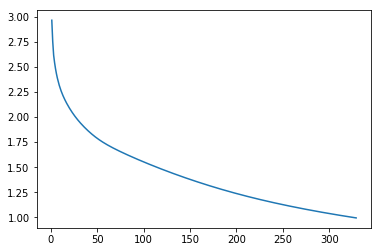

In [466]:
plt.plot(test["score_array"])